# Algoritma pencarian Grover

## Masalah Pencarian

Banyak masalah yang diselesaikan oleh komputer adalah jenis *masalah pencarian* . Anda mungkin sudah menelusuri web menggunakan mesin telusur, yaitu program yang membuat basis data dari situs web dan memungkinkan Anda menelusurinya. Kita dapat menganggap database sebagai program yang mengambil alamat sebagai input, dan menampilkan data di alamat itu. Buku telepon adalah salah satu contoh database; setiap entri dalam buku berisi nama dan nomor. Sebagai contoh, kita mungkin meminta database untuk memberi kita data di alamat ke-3441, dan itu akan mengembalikan nama dan nomor ke-3441 di buku.

![Aliran informasi dalam database kotak hitam.](images/grover/database-phonebook.svg)

<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

Kita menyebut proses memberikan input dan membaca output ini "meminta database". Seringkali dalam ilmu komputer, kita menganggap database sebagai kotak hitam, yang berarti kita tidak diizinkan untuk melihat cara kerjanya; kita hanya akan menganggap itu adalah proses ajaib yang melakukan persis seperti yang mereka janjikan. Kita menyebut proses magis seperti ini "ramalan".

<!-- vale QiskitTextbook.SentenceLengthWarning = YES -->

Jika kita memiliki nama seseorang dan kita mencoba mencari nomor teleponnya, hal tersebut akan menjadi mudah jika buku tersebut diurutkan menurut abjad berdasarkan nama. Kita dapat menggunakan algoritma yang disebut *pencarian biner* .

<!-- ::: q-block -->

### Contoh: Pencarian Biner

<!-- ::: q-carousel -->

<!-- ::: div -->

![Contoh database](images/grover/carousel/0/0.svg)

Pencarian biner adalah algoritma klasik yang sangat efisien untuk mencari basis data yang diurutkan. Anda mungkin pernah menggunakan sesuatu yang serupa saat mencari halaman tertentu di buku (atau bahkan menggunakan buku telepon fisik). Katakanlah kita ingin mencari nomor telepon Evelina.

<!-- ::: -->

<!-- ::: div -->

![Contoh langkah pertama dari algoritma pencarian biner, komputer telah memilih entri tengah](images/grover/carousel/0/1.svg)

Pertama, kita memeriksa item tengah di database dan melihat apakah lebih tinggi atau lebih rendah dari item yang kita cari.

<!-- ::: -->

<!-- ::: div -->

![Langkah kedua dari algoritma pencarian biner](images/grover/carousel/0/2.svg)

Dalam hal ini "H" muncul setelah "E". Karena daftarnya diurutkan, kita tahu bahwa alamat entri yang kita cari harus lebih rendah dari 7. Kita dapat mengabaikan alamat apapun yang lebih besar dari 6 dan mengulangi algoritma ini pada daftar yang telah dikurangi.

<!-- ::: -->

<!-- ::: div -->

![Langkah ketiga dari algoritma pencarian biner](images/grover/carousel/0/3.svg)

Kali ini, nama entri tengah diawali dengan "D". yang muncul sebelum "E". Sekarang kita tahu entri kita seharusnya memiliki alamat lebih besar dari 4.

<!-- ::: -->

<!-- ::: div -->

![Langkah keempat dari algoritma pencarian biner](images/grover/carousel/0/4.svg)

Setiap langkah membagi dua ukuran dari daftar yang sedang kita kerjakan, sehingga ruang pencarian *menyusut* secara eksponensial.

<!-- ::: -->

<!-- ::: div -->

![Langkah kelima dari algoritma pencarian biner](images/grover/carousel/0/5.svg)

Artinya, meskipun dengan database yang sangat besar, kita dapat menemukan entri dengan cepat.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- ::: q-block.exercise -->

### Kuis cepat

<!-- ::: q-quiz(goal="intro-grover-0") -->

Jumlah maksimum kueri database yang diperlukan tumbuh secara logaritmik (basis 2) dengan jumlah entri dalam database.

<!-- ::: .question -->

Menggunakan pencarian biner, berapa jumlah kueri terbesar yang kita perlukan untuk mencari database yang diurutkan dengan 1024 entri?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 10

<!-- ::: -->

<!-- ::: .option -->

1. 1

<!-- ::: -->

<!-- ::: .option -->

1. 100

<!-- ::: -->

<!-- ::: -->

*Petunjuk: berapa kali Anda perlu membagi dua database agar hanya tersisa satu item?*

<!-- ::: -->

Karena pencarian biner tumbuh secara [logaritmis](gloss:logarithm) dengan ukuran database, tidak banyak ruang untuk perbaikan dari komputer kuantum. Tetapi kita tidak selalu memiliki kemudahan untuk mencari daftar yang diurutkan. Bagaimana jika kira diberi nomor telepon, dan kita ingin menemukan nama yang terkait dengan nomor itu?

Ini jauh lebih sulit, karena buku telepon biasanya tidak diurutkan berdasarkan nomor. Jika kita menganggap nomor telepon diurutkan secara acak dalam daftar, tidak ada cara untuk mendekati target kita seperti yang kita lakukan sebelumnya. Cara terbaik yang bisa kita lakukan dengan komputer klasik adalah dengan secara acak memilih alamat input, melihat apakah itu berisi nomor telepon yang kita cari, dan mengulanginya sampai kita menemukan entri yang benar. Karena alasan ini, banyak pekerjaan dilakukan untuk [mengindeks](gloss:index) database untuk meningkatkan waktu pencarian.

Ketika database benar-benar tidak teratur seperti ini, kita katakan itu *tidak terstruktur*. Dan algoritma quantum yang akan kita pelajari di halaman ini adalah algoritma untuk pencarian tidak terstruktur.

<!-- ::: q-block.exercise -->

### Pencarian tidak terstruktur

<!-- ::: q-quiz(goal="intro-grover-1") -->

<!-- ::: .question -->

Jika kita mencari database yang tidak terstruktur dengan memilih input secara acar, berapa rata-rata input yang perlu kita periksa sebelum kita menemukan entri yang kita cari?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. Setengah dari input yang mungkin.

<!-- ::: -->

<!-- ::: .option -->

1. Semua masukan yang mungkin.

<!-- ::: -->

<!-- ::: .option -->

1. Tiga perempat dari input yang mungkin.

<!-- ::: -->

<!-- ::: -->

---

<!-- ::: q-quiz(goal="intro-grover-2") -->

<!-- ::: .question -->

Menggunakan tebakan acak, bagaimana jumlah rata-rata kueri database yang dibutuhkan tumbuh dengan jumlah entri dalam database?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. Secara linear.

<!-- ::: -->

<!-- ::: .option -->

1. Secara logaritmic.

<!-- ::: -->

<!-- ::: .option -->

1. Secara kuadrat.

<!-- ::: -->

<!-- ::: .option -->

1. Secara eksponensial.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

Tampaknya kita tidak mungkin melakukan yang lebih baik daripada menebak secara acak di sini; kita tidak tahu di mana entri yang benar akan berada di database, dan setiap kueri yang salah hanya mengesampingkan satu entri.

<!-- vale QiskitTextbook.SentenceLengthWarning = YES -->

Untuk komputer klasik, intuisi kita benar, tetapi jika basis data kita dapat memasukkan dan mengeluarkan superposisi kuantum, ternyata kita dapat melakukannya lebih baik daripada tebakan acak! Di halaman ini kita akan belajar tentang algoritma kuantum pertama kita: algoritma pencarian kuantum Grover. Saat mencari basis data apa pun (terstruktur atau tidak terstruktur), algoritma Grover tumbuh dengan *akar kuadrat* dari jumlah input, yang untuk pencarian tidak terstruktur merupakan peningkatan [kuadrat](gloss:quadratic) dari algoritma klasik terbaik.

![Perbandingan waktu berjalan algoritma terbaik untuk pencarian tak terstruktur kuantum dan klasik](images/grover/rg-vs-grover.svg)

## Di luar kotak hitam

Algoritma pencarian dapat mencari database dari informasi yang dikumpulkan seperti buku telepon, tetapi mereka juga dapat melakukan lebih dari itu. Jika kita dapat membuat suatu masalah *terlihat* seperti masalah pencarian basis data, maka kita dapat menggunakan algoritma pencarian untuk menyelesaikannya. Sebagai contoh, mari pertimbangkan masalah memecahkan [sudoku](gloss:sudoku). Jika seseorang mengklaim telah memecahkan sudoku, Anda dapat memeriksa apakah itu diselesaikan dengan cukup cepat: Anda memeriksa setiap baris, memeriksa setiap kolom, memeriksa setiap kotak, dan Anda selesai. Dalam pengertian ini, *Anda* adalah basis datanya, dan orang yang memberi Anda solusi sedang menanyakan Anda. Mereka mencoba mencari masukan yang mengembalikan informasi “Iya ini adalah solusi yang valid”.

Faktanya, kita dapat menampilkan banyak masalah komputasi seperti "menemukan input yang menghasilkan output tertentu".

![Kita dapat melihat program yang menilai solusi yang diusulkan sebagai database.](images/grover/database-computation.svg)

<!-- vale QiskitTextbook.Acronyms = NO -->

Salah satu contoh masalah yang dapat kita selesaikan seperti ini adalah Boolean Satisfiability Problem (dikenal sebagai 'SAT').

## Masalah SAT

Masalah SAT dipelajari secara luas dalam ilmu komputer, dan banyak masalah komputasi lainnya dapat diubah menjadi masalah SAT. Di halaman ini kita akan menggunakan algoritma Grover untuk menyelesaikan masalah SAT sederhana, dan Anda dapat menggunakan keterampilan yang Anda pelajari di sini untuk menerapkan algoritma pencarian kuantum ke masalah lain.

Solusi untuk masalah SAT adalah rangkaian bit, yang memudahkan pemetaan ke sirkuit kuantum. Masalahnya sendiri pada dasarnya adalah sekumpulan kondisi (kita menyebutnya klausa) yang mengesampingkan kombinasi nilai bit yang berbeda. Misalnya, jika kita memiliki tiga bit, salah satu klausanya mungkin adalah "Anda tidak dapat `ON` bit nol *dan* bit pertama `OFF` ", yang akan mengesampingkan kombinasi `101` dan `001` sebagai solusi yang valid.

Ini file yang menyandikan masalah *" [3-SAT](gloss:3-sat) "*, yang merupakan masalah SAT di mana setiap klausa merujuk tepat ke 3 bit, dan salah satu dari kondisi bit ini di setiap klausa harus dipenuhi. 

<!-- ::: q-block -->

### Contoh soal 3-SAT

Berikut adalah contoh soal 3-SAT, disimpan dalam format file bernama "DIMACS CNF". File-file ini sangat sederhana dan hanya salah satu cara untuk menyimpan masalah SAT.

$\cssId{_dimacs-c}{\texttt{c example DIMACS-CNF 3-SAT}}$ <br> $\cssId{_dimacs-problem}{\texttt{p cnf 3 5}}$ <br> $\texttt{-1 -2 -3 0}$<br> $\cssId{_dimacs-clause-1}{\texttt{1 -2 3 0}}$ <br> $\texttt{1 2 -3 0}$<br> $\cssId{_dimacs-clause-3}{\texttt{1 -2 -3 0}}$ <br> $\cssId{_dimacs-clause-4}{\texttt{-1 2 3 0}}$ <br>

<!-- ::: -->

<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

Seperti sudoku, mudah untuk memeriksa apakah bit string adalah solusi yang valid untuk masalah SAT; kita hanya melihat setiap klausa secara bergantian dan melihat apakah string kita tidak mematuhi salah satunya. Dalam kursus ini, kita tidak akan khawatir tentang bagaimana kita melakukannya di sirkuit kuantum. Ingat saja kita memiliki algoritma klasik yang efisien untuk memeriksa solusi SAT, dan untuk saat ini kita hanya akan menggunakan alat bawaan Qiskit untuk membangun sirkuit yang melakukan ini untuk kita.

<!-- vale QiskitTextbook.SentenceLengthWarning = YES -->

Kita telah menyimpan file ini di dalam `examples/3sat.dimacs` (relatif terhadap kode yang kita jalankan).

In [1]:
with open('examples/3sat.dimacs', 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)  # mari kita periksa apakah file tersebut sesuai dengan yang dijanjikan

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

Kita dapat menggunakan library sirkuit Qiskit untuk membuat sirkuit yang melakukan pekerjaan oracle yang kami jelaskan di atas (kita akan tetap menyebut sirkuit ini sebagai 'oracle' meskipun tidak lagi ajaib dan mahakuasa).

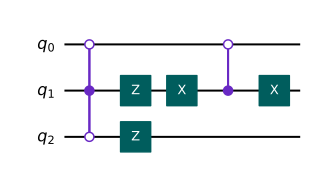

In [2]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('examples/3sat.dimacs')
oracle.draw()

Sirkuit diatas bertindak mirip dengan database yang kita jelaskan sebelumnya. Input ke sirkuit ini adalah string 3 bit, dan output yang diberikan bergantung pada apakah input string tersebut merupakan solusi untuk masalah SAT atau tidak.

Hasil dari komputasi pengecekan ini masih berupa `True` atau `False`, tapi perilaku dari sirkuit ini sedikit berbeda yang yang Anda harapkan. Untuk menggunakan sirkuit ini dengan algoritma Grover, kita ingin oracle mengubah fase keadaan output sebesar 180° (yakni dikalikan dengan -1) jika keadaan adalah solusi. Inilah mengapa Qiskit menyebut kelas '`PhaseOracle`'.

$$ U_\text{oracle}|x\rangle = \bigg{ \begin{aligned} \phantom{-}|x\rangle &amp; \quad \text{if $x$ is not a solution} \ -|x\rangle &amp; \quad \text{if $x$ is a solution} \ \end{aligned} $$

Sebagai contoh, satu-satunya solusi untuk masalah ini adalah `000`. `011`, dan `101`, jadi sirkuit diatas mempunyai matriks berikut:

$$ U_\text{oracle} = \begin{bmatrix} -1 &amp; 0 &amp; 0 &amp;  0 &amp; 0 &amp;  0 &amp; 0 &amp; 0  \ 0 &amp; 1 &amp; 0 &amp;  0 &amp; 0 &amp;  0 &amp; 0 &amp; 0  \ 0 &amp; 0 &amp; 1 &amp;  0 &amp; 0 &amp;  0 &amp; 0 &amp; 0  \ 0 &amp; 0 &amp; 0 &amp; -1 &amp; 0 &amp;  0 &amp; 0 &amp; 0  \ 0 &amp; 0 &amp; 0 &amp;  0 &amp; 1 &amp;  0 &amp; 0 &amp; 0  \ 0 &amp; 0 &amp; 0 &amp;  0 &amp; 0 &amp; -1 &amp; 0 &amp; 0  \ 0 &amp; 0 &amp; 0 &amp;  0 &amp; 0 &amp;  0 &amp; 1 &amp; 0  \ 0 &amp; 0 &amp; 0 &amp;  0 &amp; 0 &amp;  0 &amp; 0 &amp; 1  \ \end{bmatrix} $$

Untuk meringkas:

1. Ada masalah yang mudah diperiksa apakah solusi yang diusulkan benar.
2. Kita dapat mengonversi algoritma yang memeriksa solusi menjadi sirkuit quantum yang mengganti fase status dari status solusi.
3. Kita kemudian dapat menggunakan algoritma Grover untuk mengetahui status mana yang fasenya berubah.

Dalam pengertian ini, database atau oracle *adalah masalah* yang harus dipecahkan.

![Gambar yang menunjukkan input ke algoritma Grover sebagai oracle dan output adalah solusi untuk oracle tersebut](images/grover/grover-input-output.svg)

## Gambaran umum tentang algoritma Grover

Sekarang kita memahami masalahnya, akhirnya kita sampai pada algoritma Grover. Algoritma Grover memiliki tiga langkah:

1. Langkah pertama adalah membuat superposisi yang setara dari setiap input yang mungkin ke oracle. jika semua qubit kita dimulai dalam keadaan $|0\rangle$, kita dapat membuat superposisi ini dengan menerapkan gerbang H ke setiap qubit. Kita akan menyebut keadaan superposisi yang sama ini '$|s\rangle$'.

2. Langkah selanjutnya adalah menjalankan sirkuit oracle ($U_\text{oracle}$) pada qubit ini. Di halaman ini, kita akan menggunakan sirkuit (`oracle`) yang dibuat Qiskit  untuk kita di atas, tetapi kita dapat menggunakan sirkuit atau perangkat keras apa pun yang mengubah fase dari keadaan solusi.

3. Langkah terakhir adalah menjalankan sirkuit yang disebut 'operator difusi' atau 'diffuser' ($U_s$) pada qubit. Kita akan membahas sirkuit ini saat menjelajahi algoritma Grover di bagian selanjutnya, tetapi ini adalah sirkuit yang sangat sederhana yang sama untuk semua oracle.

Kita selanjutnya perlu mengulangi langkah 2 &amp; 3 beberapa kali tergantung pada ukuran sirkuit. Perhatikan bahwa kita mengkueri oracle pada langkah #2, sehingga jumlah kueri kira-kira sebanding dengan akar kuadrat dari jumlah input yang mungkin. Jika kita mengulangi 2 &amp; 3 kali dalam jumlah yang tepat, maka saat kita mengukur, kita akan memiliki peluang yang besar untuk mengukur solusi ke oracle.

![Diagram sirkuit ringkas dari algoritma Grover](images/grover/grover-circuit-high-level.png)

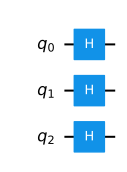

In [3]:
from qiskit import QuantumCircuit
init = QuantumCircuit(3)
init.h([0,1,2])
init.draw()

Selanjutnya, kita dapat kembali menggunakan alat Qiskit untuk membuat sirkuit yang melakukan langkah 2 &amp; 3 untuk kita. 

In [4]:
# langkah 2 & 3 dari algoritma Grover
from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)

Dan kita bisa menggabungkan ini menjadi rangkaian yang menjalankan algoritma Grover. Di sini, kita tidak akan mengulangi langkah 2 &amp; 3 karena ini adalah masalah kecil dan melakukannya sekali saja sudah cukup.

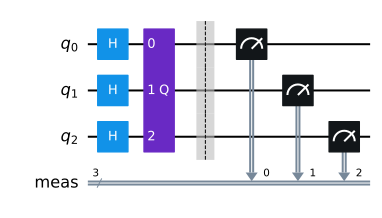

In [5]:
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw()

Akhirnya, mari kita jalankan ini di simulator dan lihat hasil apa yang kita dapatkan:

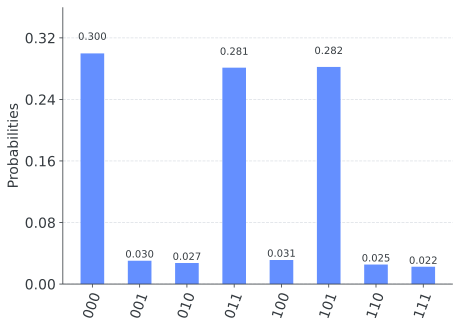

In [6]:
# Simulasikan sirkuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# plot hasilnya
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Kita memiliki kemungkinan besar untuk mengukur salah satu dari 3 solusi untuk masalah SAT.

<!-- ::: q-block.exercise -->

### Kuis cepat

<!-- ::: q-quiz(goal="intro-grover-3") -->

<!-- ::: .question -->

Manakah dari string bit ini yang merupakan solusi untuk masalah SAT yang diselesaikan oleh sirkuit kuantum ini?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. `011`

<!-- ::: -->

<!-- ::: .option -->

1. `001`

<!-- ::: -->

<!-- ::: .option -->

1. `010`

<!-- ::: -->

<!-- ::: .option -->

1. `110`

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## Bagaimana cara kerja algoritma Grover?

Kita telah belajar tentang masalah pencarian, dan melihat algoritma Grover digunakan untuk menyelesaikannya. Tapi bagaimana, dan mengapa, ini berhasil?

<!-- ::: q-block -->

### Memvisualisasikan algoritma Grover

<!-- ::: q-carousel -->

<!-- ::: div -->

Algoritma Grover memiliki penjelasan geometris yang bagus. Kita telah melihat bahwa kita dapat merepresentasikan status kuantum melalui vektor. Dengan masalah pencarian seperti ini, hanya ada dua vektor yang kita pedulikan: Solusi, dan yang lainnya. Kita akan memanggil superposisi dari semua status solusi '$|✓\rangle$', jadi untuk soal SAT di atas:

$$|✓\rangle = \tfrac{1}{\sqrt{3}}(|000\rangle + |011\rangle + |101\rangle)$$

dan kita akan memanggil superposisi dari setiap keadaan lain '$|✗\rangle$':

$$|✗\rangle = \tfrac{1}{\sqrt{5}}(|001\rangle + |010\rangle + |100\rangle + |110\rangle + |111\rangle)$$

<!-- ::: -->

<!-- ::: div -->

**Bidang**

![Gambar menunjukkan |omega> dan |s prime> sebagai sumbu y dan x dari ruang 2D](images/grover/carousel/1/0.svg)

Karena kedua vektor $|✓\rangle$ dan $|✗\rangle$ tidak berbagi elemen apa pun, keduanya tegak lurus, jadi kita dapat menggambarnya pada sudut siku-siku pada bidang 2D. Ini akan menjadi sumbu y dan x kita masing-masing.

<!-- ::: -->

<!-- ::: div -->

**Langkah 1**

![Gambar menunjukkan |omega> dan |s prime> sebagai sumbu y dan x dari ruang 2D](images/grover/carousel/1/1.svg)

Mari plot status komputer kuantum kita di bidang ini pada titik berbeda dalam algoritma. Status pertama yang akan kita plot adalah $|s\rangle$. Ini adalah keadaan *setelah* langkah 1 (langkah inisialisasi). Status ini adalah superposisi yang sama dari semua status basis komputasi. Karena keadaan apa pun yang mungkin adalah solusi atau bukan solusi, kita dapat menulis $|s\rangle$ sebagai kombinasi dari $|✓\rangle$ dan $|✗\rangle$, sehingga berada di antara mereka di pesawat kita.

$$|s\rangle = a|✗\rangle + b|✓\rangle$$

<!-- ::: -->

<!-- ::: div -->

**Langkah 1**

![Gambar menunjukkan |s> pada bidang |omega> / |s-prime>](images/grover/carousel/1/1.svg)

Untuk masalah yang sulit, kita berharap ada banyak masukan yang mungkin, tetapi hanya sejumlah kecil solusi. Dalam hal ini, $|s\rangle$ akan lebih dekat ke $|✗\rangle$ daripada $|✓\rangle$ (yaitu sudut, $\theta$, di antara mereka kecil), jadi kecil kemungkinan pengukuran akan berikan salah satu status basis komputasi yang membentuk $|✓\rangle$. Sasaran kita adalah berakhir dengan komputer dalam keadaan sedekat mungkin dengan $|✓\rangle$.

<!-- ::: -->

<!-- ::: div -->

**Langkah 2**

![Gambar menunjukkan U_omega|s> pada bidang |omega> / |s-prime>](images/grover/carousel/1/2.svg)

Selanjutnya kita melewatkan qubit kita melalui sirkuit $U_\text{Oracle}$. Kita melihat di atas bahwa, menurut definisi, $U_\text{Oracle}$ membalik fase dari semua status solusi. Dalam diagram kita, ini adalah refleksi melalui vektor $|✗\rangle$. Yaitu:

$$a|✗\rangle + b|✓\rangle \xrightarrow{\text{oracle}} a|✗\rangle - b|✓\rangle$$

<!-- ::: -->

<!-- ::: div -->

**Langkah 3**

![Gambar menunjukkan U_omega|s> pada pesawat |omega> / |s-prime>](images/grover/carousel/1/2.svg)

Kita baru saja melihat bahwa kita dapat merefleksikan melalui vektor $|✗\rangle$, jadi apakah ada vektor lain yang dapat kita refleksikan yang akan memindahkan keadaan kita lebih dekat ke $|✓\rangle$? Jawabannya adalah 'ya', kita bisa merefleksikan melalui vektor $|s\rangle$. Mungkin tidak jelas pada awalnya bagaimana kita dapat membuat sirkuit yang melakukan ini, tetapi ini adalah operasi yang relatif sederhana yang akan kita bahas nanti di halaman ini.

<!-- ::: -->

<!-- ::: div -->

**Selesai (atau ulangi)**

![Gambar menunjukkan U_omega|s> pada bidang |omega> / |s-prime>](images/grover/carousel/1/3.svg)

Sekarang vektor status kita lebih dekat ke $|✓\rangle$ daripada sebelumnya, yang berarti kita memiliki peluang lebih tinggi untuk mengukur salah satu status solusi kita. Jika hanya ada satu solusi, kita perlu mengulangi langkah 2 &amp; 3 ~$\sqrt{N}$ kali untuk mendapatkan probabilitas tertinggi dalam mengukur solusi tersebut.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- ::: q-block -->

### Berapa kali kita perlu menanyakan oracle?

<!-- ::: q-carousel -->

<!-- ::: div -->

![Gambar menunjukkan |omega> dan |s prime> sebagai sumbu y dan x dari ruang 2D](images/grover/carousel/2/0.svg)

Untuk menyelesaikannya, kita harus menghitung seberapa banyak setiap iterasi merotasi state kita menuju $|✓\rangle$. Katakanlah kita berada di suatu tempat di tengah algoritma kita, keadaan komputer kita ($|\psi\rangle$) adalah sudut $\phi$ dari keadaan awal $|s\rangle$. Sudut antara $|\psi\rangle$ dan $|✗\rangle$ adalah $\theta + \phi$.

<!-- ::: -->

<!-- ::: div -->

![Gambar menunjukkan |omega> dan |s prime> sebagai sumbu y dan x dari ruang 2D](images/grover/carousel/2/1.svg)

Oracle mencerminkan vektor keadaan komputer kita di sekitar $|✗\rangle$, jadi sudut antara vektor keadaan baru kita yang dipantulkan ($|\psi'\rangle$) dan $|✗\rangle$ juga akan menjadi $\theta + \phi$.

<!-- ::: -->

<!-- ::: div -->

![Gambar menunjukkan |s> pada bidang |omega> / |s-prime>](images/grover/carousel/2/2.svg)

Selanjutnya kita renungkan melalui $|s\rangle$. Sudut antara status komputer kita ($|\psi'\rangle$) dan $|s\rangle$ adalah $2\theta + \phi$.

<!-- ::: -->

<!-- ::: div -->

![Gambar menunjukkan U_omega|s> pada pesawat |omega> / |s-prime>](images/grover/carousel/2/3.svg)

Jadi, setelah satu iterasi, kita tahu sudut antara keadaan komputer kita dan $|s\rangle$ juga $2\theta + \phi$.

<!-- ::: -->

<!-- ::: div -->

![Gambar menunjukkan U_omega|s> pada bidang |omega> / |s-prime>](images/grover/carousel/2/4.svg)

Yang berarti setiap iterasi merotasi status komputer kita menuju $|✓\rangle$ sebesar $2\theta$.

<!-- ::: -->

<!-- ::: div -->

![Gambar menunjukkan U_omega|s> pada pesawat |omega> / |s-prime>](images/grover/carousel/2/5.svg)

Sekarang kita hanya perlu menentukan berapa banyak $2\theta$ yang cocok dengan sudut siku-siku, dan ini akan menjadi kira-kira jumlah iterasi yang diperlukan untuk memutar $|s\rangle$ menjadi $|✓\rangle$.

<!-- ::: -->

<!-- ::: div -->

![Gambar menunjukkan U_omega|s> pada bidang |omega> / |s-prime>](images/grover/carousel/2/6.svg)

Jadi apa sudut $\theta$ dalam hal $N$? Dengan sedikit trigonometri, kita tahu bahwa $\sin(\theta)$ sama dengan komponen $|✓\rangle$ dari $|s\rangle$, dibagi dengan panjang $|s\rangle$ (yaitu 1). Jika hanya ada satu status solusi, maka $|s\rangle = \tfrac{1}{\sqrt{N}}(|0\rangle + |1\rangle \dots + |✓\rangle \dots + |N-1 \rangle)$. Jadi $\sin(\theta) = \tfrac{1}{\sqrt{N}}$.

<!-- ::: -->

<!-- ::: div -->

![Gambar menunjukkan U_omega|s> pada bidang |omega> / |s-prime>](images/grover/carousel/2/7.svg)

Terakhir, untuk soal yang sulit, $\theta$ akan menjadi sangat kecil, yang berarti kita dapat menggunakan pendekatan sudut kecil untuk mengatakan $\theta \approx \tfrac{1}{\sqrt{N}}$ radian.

<!-- ::: -->

<!-- ::: div -->

![Gambar menunjukkan U_omega|s> pada pesawat |omega> / |s-prime>](images/grover/carousel/2/8.svg)

Karena, untuk $\theta$ kecil, kita ingin memutar $|s\rangle$ di sekitar $\pi/2$ radian, ini berarti kita perlu melakukan kira-kira $\tfrac{\pi}{2}\div\tfrac{ 2}{\sqrt{N}} = \tfrac{\pi}{4}\sqrt{N}$ perulangan. Karena kita mengkueri oracle satu kali per iterasi, jumlah kueri oracle yang diperlukan sebanding dengan $\sqrt{N}$, jika hanya ada satu solusi.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- ::: q-block.exercise -->

### Kuis cepat

<!-- ::: q-quiz(goal="intro-grover-4") -->

<!-- ::: .question -->

Untuk oracle dengan banyak kemungkinan input dan tepat satu solusi, $\theta \approx \tfrac{1}{\sqrt{N}}$. Berapa perkiraan nilai $\theta$ jika ada *dua* solusi?

<!-- ::: -->

<!-- ::: .option -->

1. $\theta \approx \tfrac{2}{\sqrt{N}}$

<!-- ::: -->

<!-- ::: .option(correct) -->

1. $\theta \approx \tfrac{\sqrt{2}}{\sqrt{N}}$

<!-- ::: -->

<!-- ::: .option -->

1. $\theta \approx \tfrac{1}{\sqrt{2N}}$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## Sirkuit untuk algoritma Grover

Untuk mengakhiri bab ini, kita akan membuat sirkuit sederhana dari awal yang mengimplementasikan algoritma Grover, dan menunjukkannya berfungsi. Kita akan menggunakan dua qubit, dan kita akan mulai dengan membuat sirkuit oracle.

In [7]:
from qiskit import QuantumCircuit

### Oracle

Sederhananya, kita tidak akan memecahkan masalah nyata di sini. Untuk demonstrasi ini, kita akan membuat sirkuit yang membalikkan fase keadaan $|11\rangle$ dan membiarkan yang lainnya tidak berubah. Untungnya, kita sudah mengetahui gerbang dua qubit yang melakukan hal itu!

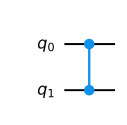

In [8]:
oracle = QuantumCircuit(2)
oracle.cz(0,1)  # Membalikan fase |11>
oracle.draw()

Berikut adalah fungsi singkat untuk menunjukkan representasi matriks dari rangkaian ini:

In [9]:
def display_unitary(qc, prefix=""):
    """Mensimulasikan rangkaian sederhana dan menampilkan representasi matriksnya.
    Args:
        qc (QuantumCircuit): Sirkuit yang akan dikompilasi menjadi matriks kesatuan
        prefix (str): LaTeX opsional untuk ditampilkan sebelum matriks
    Returns:
        None (menampilkan matriks sebagai efek samping)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Selanjutnya, kita akan membuat salinan sirkuit dan mengerjakannya
    # agar kita tidak mengubah apa pun sebagai efek samping
    qc = qc.copy()
    # Beri tahu simulator untuk menyimpan matriks kesatuan
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

display_unitary(oracle, "U_\\text{oracle}=")

<IPython.core.display.Latex object>

<!-- ::: q-block.exercise -->

### Cobalah

Bisakah Anda membuat 3 sirkuit oracle lagi yang malah menargetkan 3 status basis komputasi lainnya ($|00\rangle$, $|01\rangle$ dan $|10\rangle$)? Gunakan `display_unitary` untuk memeriksa jawaban Anda.

*Petunjuk:* Cobalah untuk membuat sirkuit yang mengubah $|11\rangle$ ke dan dari keadaan dasar yang Anda targetkan, dapatkah Anda menggunakan sirkuit ini dengan gerbang `cz`?

[Coba di IBM Quantum Lab](https://quantum-computing.ibm.com/lab)

<!-- ::: -->

### Membuat diffuser

Selanjutnya kita akan membuat diffuser untuk dua qubit. Ingatlah bahwa kita ingin melakukan refleksi di sekitar keadaan $|s\rangle$, jadi mari kita lihat apakah kita dapat menggunakan alat yang sudah kita miliki untuk membuat sirkuit yang melakukan refleksi ini.

Kita telah melihat bahwa gerbang `cz` melakukan refleksi di sekitar $|11\rangle$ (hingga fase global), jadi jika kita mengetahui transformasi yang memetakan $|s\rangle \rightarrow |11\rangle$, kita dapat :

1. Lakukan transformasi $|s\rangle \rightarrow |11\rangle$
2. Refleksikan sekitar $|11\rangle$ (yaitu gerbang `cz` )
3. Lakukan transformasi $|11\rangle \rightarrow |s\rangle$

Kita tahu bahwa kita dapat membuat status $|s\rangle$ dari status $|00\rangle$ dengan menerapkan gerbang-H ke setiap qubit. Karena gerbang-H adalah kebalikannya sendiri, menerapkan gerbang-H ke setiap qubit juga berarti $|s\rangle \rightarrow |00\rangle$.

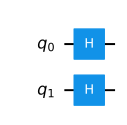

In [10]:
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.draw()

Sekarang kita perlu mengetahui bagaimana kita mengubah $|00\rangle \rightarrow |11\rangle$.

<!-- ::: q-block.exercise -->

### Kuis cepat

<!-- ::: q-quiz(goal="intro-grover-5") -->

<!-- ::: .question -->

Manakah dari gerbang berikut yang mengubah $|0\rangle \rightarrow |1\rangle$?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. `x`

<!-- ::: -->

<!-- ::: .option -->

1. `z`

<!-- ::: -->

<!-- ::: .option -->

1. `h`

<!-- ::: -->

<!-- ::: .option -->

1. `s`

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

Jadi menerapkan gerbang-X ke setiap qubit akan melakukan transformasi $|00\rangle \rightarrow |11\rangle$. Ayo lakukan itu:

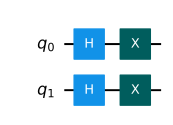

In [11]:
diffuser.x([0,1])
diffuser.draw()

Sekarang kita memiliki transformasi $|s\rangle \rightarrow |11\rangle$, kita dapat menerapkan gerbang `cz` dan membalikkan transformasi.

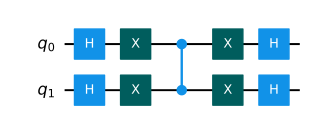

In [12]:
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.draw()

### Menyatukannya

Kita sekarang memiliki dua sirkuit, `oracle` dan `diffuser` , jadi kita dapat menyatukannya ke dalam sirkuit yang menjalankan algoritma Grover. Ingat tiga langkah:

1. Inisialisasi qubit ke status $|s\rangle$
2. Lakukan oracle
3. Lakukan diffuser

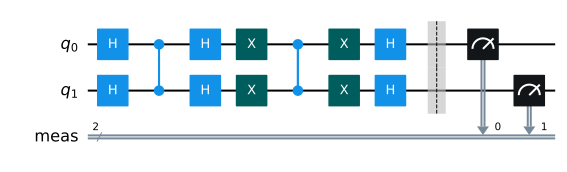

In [13]:
grover = QuantumCircuit(2)
grover.h([0,1])  # inisiasi |s>
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw()

Dan ketika kita mensimulasikan, kita dapat melihat probabilitas 100% untuk mengukur $|11\rangle$, yang merupakan solusi untuk oracle kita!

In [14]:
from qiskit import Aer
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'11': 1024}

<!-- ::: q-block.exercise -->

### Cobalah

Coba ganti oracle di sirkuit ini dengan oracle berbeda yang Anda buat di atas. Apakah Anda mendapatkan hasil yang diharapkan?

[Coba di IBM Quantum Lab](https://quantum-computing.ibm.com/lab)

<!-- ::: -->

## Masalah SAT sulit

![Grafik ukuran masalah vs waktu berjalan algoritma. Baik tebakan acak maupun algoritma Grover ditampilkan sebagai kurva eksponensial, dengan pertumbuhan Grover sedikit lebih lambat daripada tebakan acak.](images/grover/rg-vs-grover-sat.svg)

Tebakan acak tumbuh secara linier dengan jumlah entri dalam database, yang sebenarnya tidak terlalu buruk (walaupun kita tahu kita bisa melakukan jauh lebih baik). Tapi kita biasanya mengukur bagaimana algoritma tumbuh dengan panjang masukannya *bit*, jadi bagaimana keduanya terhubung? Setiap variabel ekstra (bit) dalam masalah SAT kita *menggandakan* jumlah solusi yang mungkin (yaitu entri ke database kita), sehingga ruang pencarian bertambah secara eksponensial dengan jumlah bit.

$$\cssId{Big-N}{N} = 2^\cssId{lil-n}{n}$$

Karena tebakan acak tumbuh secara linier dengan $N$, waktu berjalan akan bertambah sekitar $2^n$.

<!-- ::: q-block.exercise -->

### Kuis cepat

<!-- ::: q-quiz(goal="intro-grover-6") -->

<!-- ::: .question -->

Bagaimana waktu berjalan algoritma Grover bertambah dengan jumlah bit input (ketika hanya ada satu solusi)?

<!-- ::: -->

<!-- ::: .option -->

1. $\sqrt{n}$

<!-- ::: -->

<!-- ::: .option -->

1. $2^n$

<!-- ::: -->

<!-- ::: .option(correct) -->

1. $\sqrt{2^n}$

<!-- ::: -->

<!-- ::: .option -->

1. $\sqrt{2^{n/2}}$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## Memanfaatkan struktur

Sejauh ini, kita telah memperlakukan masalah SAT seolah-olah tidak terstruktur sama sekali, tetapi tidak seperti buku telepon yang tidak disortir, *kita* memiliki beberapa petunjuk yang akan membantu kita dalam pencarian kita. Masalah SAT bukanlah kotak hitam, tetapi sekumpulan klausa individual, dan kita dapat menggunakan klausa ini untuk mendapatkan jawaban yang benar. Kita tidak akan mendapatkan sesuatu yang seefisien pencarian biner, tetapi masih jauh lebih baik daripada tebakan acak. Salah satu algoritma (klasik) yang menggunakan struktur masalah SAT adalah algoritma Schöning.

![Grafik ukuran masalah vs waktu berjalan algoritma. Tebakan acak, algoritma Grover dan algoritma Schöning ditampilkan sebagai kurva eksponensial, dengan Schöning tumbuh sedikit lebih lambat daripada Grover, yang pada gilirannya tumbuh lebih lambat daripada tebakan acak](images/grover/rg-vs-grov-vs-schoning.svg)

Seperti tebakan acak, algoritma Schöning memilih input secara acak dan memeriksa apakah berhasil. Tapi tidak seperti tebakan acak, itu tidak membuang string ini begitu saja. Sebagai gantinya, ia mengambil klausa yang tidak terpenuhi dan beralih sedikit di string untuk memenuhi klausa itu. Yang mengganggu, string baru ini mungkin tidak memuaskan klausa berbeda yang sebelumnya terpenuhi, tetapi rata-rata bermanfaat untuk terus mengubah bit dengan cara ini beberapa kali. Jika tebakan awal cukup dekat, ada kemungkinan besar kita akan menemukan solusi yang tepat. Jika tidak, maka setelah beberapa langkah, komputer mulai lagi dengan tebakan baru yang benar-benar acak. Ternyata untuk 3-SAT (walaupun bukan (&gt;3)-SAT), algoritma ini berkembang dengan kira-kira $1,3334^n$, yang tidak hanya mengalahkan tebakan acak, tetapi juga mengalahkan algoritma Grover!

![Grafik ukuran masalah vs waktu berjalan algoritma. Algoritma tebakan acak, Grover, Schöning, dan ](images/grover/all-algos.svg)

Ini mungkin tidak terlihat jelas pada pandangan pertama, tetapi kita sebenarnya dapat menggabungkan algoritma Grover dan Schöning untuk mendapatkan sesuatu yang lebih baik daripada keduanya secara individual. Jika Anda membuat sirkuit yang menjalankan bagian bit-toggling dari algoritma Schöning, Anda dapat menggunakan ini sebagai oracle dan menggunakan algoritma Grover untuk menemukan "tebakan awal" terbaik. Kita tidak akan membahasnya dalam kursus ini, tetapi ini adalah proyek yang menyenangkan untuk menyelidikinya!